In [83]:
import sys
sys.path.append("../vitamin_c")
import gen_benchmark_pe
import load_data_fit
from vitamin_c_fit import plot_posterior, get_params
from gwpy.timeseries import TimeSeries
import numpy as np
from gwdatafind import find_urls
import matplotlib.pyplot as plt
import time
import os
import json
import h5py

In [14]:
%matplotlib inline

In [2]:
ref_time = 1245029268
real_noise_seg = [ref_time, ref_time + 1]

In [18]:
def get_filenames(real_noise_seg):
    gwf_url = find_urls("L", "L1_HOFT_C00", real_noise_seg[0], real_noise_seg[1])
    gwf_url = gwf_url[0].replace("file://localhost","")
    ts = TimeSeries.read(gwf_url, "L1:GDS-CALIB_STRAIN",real_noise_seg[0],real_noise_seg[1])
    return ts

In [19]:
 np.random.uniform(-1e3, 1e3 )

-239.61107062851124

In [13]:
st = time.time()
for i in range(100):
    rt = ref_time + np.random.uniform(-1e3, 1e3)
    rns = [rt, rt + 1]
    t = get_filenames(rns)
ent = time.time()
print(ent - st)

44.21974492073059


In [3]:
gwf_url = find_urls("L", "L1_HOFT_C01", real_noise_seg[0], real_noise_seg[1])

In [4]:
gwf_url = gwf_url[0].replace("file://localhost","")

In [7]:
gwf_url

'/ceph/frames/O3/hoft_C01/L1/L-L1_HOFT_C01-12450/L-L1_HOFT_C01-1245028352-4096.gwf'

In [5]:
ts = TimeSeries.read(gwf_url, "L1:DCS-CALIB_STRAIN_C01")

In [6]:
ts.sample_rate

<Quantity 16384. Hz>

In [7]:
ts_rs = ts.resample(1024, window='hamming')

In [15]:
len(ts_rs)/1024

4096.0

In [26]:
ts_rs.sample_rate.value

1024.0

In [24]:
np.shape(ts_rs.value)[0]/4096

1024.0

In [32]:
dir(ts)

['DictClass',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__metadata_finalize__',
 '__mod__',
 '__module__',
 '

In [3]:
gen_benchmark_pe.gen_real_noise(1, 1024, ["H1", "L1"], ref_time, real_noise_seg)

RuntimeError: Invalid pointer

In [11]:
dir(TimeSeries.get)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [1]:
TimeSeries.get('H1:GDS_CALIB_STRAIN', ref_time + 0.5, ref_time - 0.5, host="datafind.ligo.org:443")

NameError: name 'TimeSeries' is not defined

In [ ]:
dir()

In [78]:
start_range, end_range = 0,10
segment_duration = 1
ifos = ["h1","l1","v1"]
starts = []
for i in range(len(ifos)):
    if i == 0:
        start_temp = np.random.uniform(start_range + segment_duration, end_range - segment_duration, 1)
    else:
        start_temp = np.random.uniform(start_range + segment_duration, end_range - segment_duration, 1)
        while np.any((start_temp > np.array(starts) - segment_duration) & (start_temp < np.array(starts) + segment_duration)):
            start_temp = np.random.uniform(start_range + segment_duration, end_range - segment_duration, 1)
    starts.append(start_temp[0])

In [79]:
starts

[7.828604013907079, 1.1237299884340928, 5.655523253224008]

In [2]:
load_dir = "/home/joseph.bayley/data/CBC/O4/training_polarisations_gaussnoise_2det_15par_1024Hz_1s_chrisparamoriginal/tset_tot-10000000_split-1000/"
val_dir = "/home/joseph.bayley/data/CBC/O4/validation_sets_gaussnoise_2det_15par_1024Hz_1s_chrisparamoriginal/tset_tot-1000_split-1000/"
test_dir = "/home/joseph.bayley/data/CBC/O4/test_sets_gaussnoise/1024Hz_1s_full_15par_2det_chrisparamoriginal/test_waveforms"
load_dir2 = "/home/joseph.bayley/data/CBC/O4/training_waveform_gaussnoise_2det_15par_1024Hz_1s_chrisparamoriginal/tset_tot-10000000_split-1000/"

In [3]:
params_dir = "../vitamin_c/params_files_1024Hz_1s_polarisation_chrispriororiginal/"
params = os.path.join(params_dir, 'params.json')
bounds = os.path.join(params_dir, 'bounds.json')
fixed_vals = os.path.join(params_dir, 'fixed_vals.json')

with open(params, 'r') as fp:
    params = json.load(fp)
with open(bounds, 'r') as fp:
    bounds = json.load(fp)
with open(fixed_vals, 'r') as fp:
    fixed_vals = json.load(fp)

In [8]:
params["use_real_det_noise"] = False

In [9]:
params, bounds, masks, fixed_vals = get_params(params, bounds, fixed_vals, params_dir = params_dir)

... converted RA bounds to hour angle
[False, False, True, False, False, False, False, False, False, False, False, False, False, True, True]
[True, True, False, True, True, True, True, True, True, True, True, True, True, False, False]
[ 3  4  0  5  6  7  8  9 10 11 12 13 14  1  2]
['mass_1', 'mass_2', 'luminosity_distance', 'geocent_time', 'phase', 'theta_jn', 'psi', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'ra', 'dec']
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] []
[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True] [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False] [0]
[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False] [1]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [6]:
dt = load_data_fit.DataLoader(load_dir, params = params, bounds = bounds, fixed_vals = fixed_vals, masks=masks,test_set = False, chunk_batch = 1,channel_name="DCS-CALIB_STRAIN_C01")

In [7]:
st = time.time()
dt.load_next_chunk()
print(time.time() - st)

/home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/detector/psd.py:362: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
02:14 bilby INFO    : Generating frequency domain strain from given time domain strain.
02:14 bilby INFO    : Applying a tukey window with alpha=0.4, roll off=0.2
02:14 bilby INFO    : Generating frequency domain strain from given time domain strain.
02:14 bilby INFO    : Applying a tukey window with alpha=0.4, roll off=0.2
02:14 bilby INFO    : Generating frequency domain strain from given time domain strain.
02:14 bilby INFO    : Applying a tukey window with alpha=0.4, roll off=0.2
02:14 bilby INFO    : Generating frequency domain strain from given time domain strain.
02:14 bilby INFO    : Applying a tukey window with alpha=0.4, roll off=0.2
02:14 bilby INFO    : Generating frequency domain strain from given time domain strain.
02:14 bilby INFO

load_time chunk 0: 211.3695092201233
211.374338388443


In [12]:
np.shape(dt[0][0])

(512, 1024, 2)

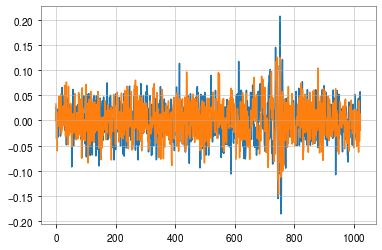

In [16]:
fig, ax = plt.subplots()
ax.plot(dt[0][0][10])

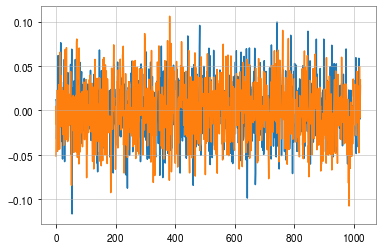

In [31]:
fig, ax = plt.subplots()
ax.plot(dt[0][0][116])

In [10]:
dt2 = load_data_fit.DataLoader(load_dir, params = params, bounds = bounds, fixed_vals = fixed_vals, masks=masks,test_set = False, chunk_batch = 1,channel_name="DCS-CALIB_STRAIN_C01")

In [11]:
st = time.time()
dt2.load_next_chunk()
print(time.time() - st)

load_time chunk 0: 2.1752586364746094
2.1771953105926514


In [30]:
load_dir = "/home/joseph.bayley/data/CBC/O4/training_polarisations_gaussnoise_2det_15par_1024Hz_1s_realnoise/tset_tot-10000000_split-1000/"
val_dir = "/home/joseph.bayley/data/CBC/O4/validation_sets_gaussnoise_2det_15par_1024Hz_1s_realnoise//tset_tot-1000_split-1000/"
test_dir = "/home/joseph.bayley/data/CBC/O4/test_sets_gaussnoise/1024Hz_1s_full_15par_2det_realnoise//test_waveforms"
load_dir2 = "/home/joseph.bayley/data/CBC/O4/training_waveform_gaussnoise_2det_15par_1024Hz_1s_realnoise//tset_tot-10000000_split-1000/"

In [33]:
params_dir = "../vitamin_c/params_files_1024Hz_1s_polarisation_realnoise/"
params = os.path.join(params_dir, 'params.json')
bounds = os.path.join(params_dir, 'bounds.json')
fixed_vals = os.path.join(params_dir, 'fixed_vals.json')

with open(params, 'r') as fp:
    params = json.load(fp)
with open(bounds, 'r') as fp:
    bounds = json.load(fp)
with open(fixed_vals, 'r') as fp:
    fixed_vals = json.load(fp)

In [34]:
load_files = os.listdir(params["noise_set_dir"])

In [36]:
file_choice = np.random.choice(load_files, 2)

In [43]:
file_choice

array(['data_1127751680-1127755776.h5py',
       'data_1134501888-1134505984.h5py'], dtype='<U31')

In [45]:
for find in file_choice:
    print(os.path.join(params["noise_set_dir"],find))
    h5py_file = h5py.File(os.path.join(params["noise_set_dir"],find), 'r')
    print(h5py_file.keys())

/home/joseph.bayley/data/CBC/O4/training_noise_gaussnoise_2det_15par_1024Hz_1s_fullparam/tset_tot-10000000_split-1000/data_1127751680-1127755776.h5py
<KeysViewHDF5 ['duration', 'real_noise_samples', 'sample_rate', 't0']>
/home/joseph.bayley/data/CBC/O4/training_noise_gaussnoise_2det_15par_1024Hz_1s_fullparam/tset_tot-10000000_split-1000/data_1134501888-1134505984.h5py
<KeysViewHDF5 ['duration', 'real_noise_samples', 'sample_rate', 't0']>


In [64]:
a = np.arange(2)
np.random.shuffle(a)
print(a)

[0 1]


In [58]:
ts = TimeSeries(h5py_file["real_noise_samples"][0], sample_rate=h5py_file["sample_rate"][0], t0=h5py_file["t0"][0])

In [60]:
ts.duration

<Quantity 4096. s>

In [75]:
t2 = ts.crop(ts.t0.value, ts.t0.value + 1)

In [76]:
t2.duration

<Quantity 1. s>

In [80]:
t2.value

array([-8.80402380e-20, -4.58758774e-21, -3.79070019e-20, ...,
       -2.16424657e-19, -2.38595526e-19, -2.19612575e-19])

In [81]:
ts.value

array([-8.80402380e-20, -4.58758774e-21, -3.79070019e-20, ...,
       -1.09111392e-19, -1.08394094e-19, -9.92920038e-20])